# RC Series Circuit-Nonlinear Fit

This notebook is used for analysis of the oscilloscope data for lab T1-EM2, PHYSICS 5BL.

## Data loading and interpolation

In [2]:
import numpy as np
import scipy.optimize as opt
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': '16'})

In [3]:
# Input oscilloscope data
Vc = np.array([3.972, 3.96, 3.933, 3.566, 2.786, 1.768, 0.768, 0.3922, 0.192, 0.07971, 0.03960]) # volts
V0 = np.array([4.01,     4, 4.005,  3.96, 3.975, 3.924,  3.88,  3.889, 3.88,    3.889,   3.895]) # volts
freq = np.array([5,     10,    20,    50,   100,   200,   500,   1000, 2000,     5000,   10000]) # Hz
omega = freq * 2 * np.pi

In [4]:
x_data = omega
y_data = Vc / V0

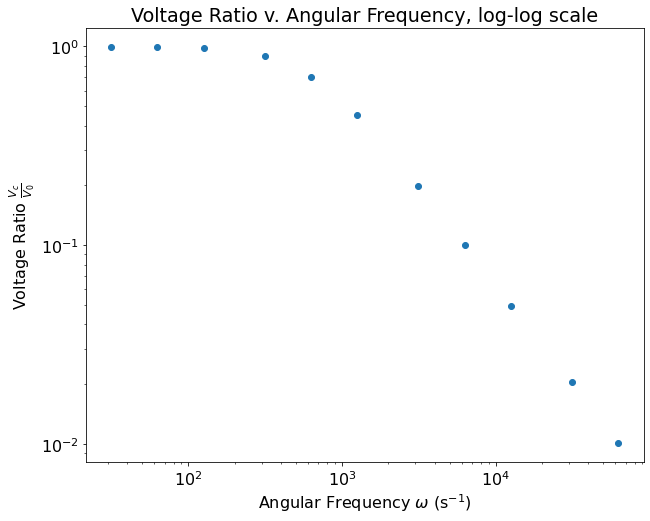

In [5]:
plt.figure(figsize=(10, 8))
plt.scatter(x_data, y_data)
plt.xlabel('Angular Frequency $\\omega$ (s$^{-1}$)')
plt.ylabel('Voltage Ratio $\\frac{V_c}{V_0}$')
plt.title('Voltage Ratio v. Angular Frequency, log-log scale')
plt.xscale('log')
plt.yscale('log')

plt.savefig('fig1.png')

## Nonlinear fits
From the theory, we define the model $\frac{V_C}{V_0}=\frac{A}{(1+\omega^2\tau^2)^{1/2}}$ for a nonlinear fit, where $\tau$ is the RC time constant.

### Define the model:

In [6]:
def ratio_model(ang_freq, A, tau):
    """Parameters are A, tau;
    independent variable is ang_freq.
    Returns the voltage ratio."""
    return A / np.sqrt(1 + ang_freq**2 * tau**2)


### Choose the model and initial fit parameter values then graph:


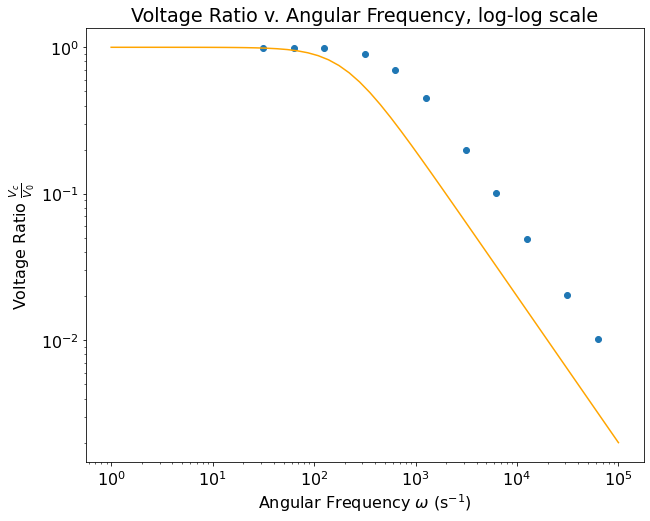

In [7]:
plt.figure(figsize=(10, 8))

# Initial guess values of fit parameters
Ainit, Tauinit = [1, 0.005]

# Graph
freq_range = np.logspace(0, 5)
plt.plot(freq_range, ratio_model(freq_range, Ainit, Tauinit), color='orange')
plt.scatter(x_data, y_data)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Angular Frequency $\\omega$ (s$^{-1}$)')
plt.ylabel('Voltage Ratio $\\frac{V_c}{V_0}$')
plt.title('Voltage Ratio v. Angular Frequency, log-log scale')
plt.show()

## Perform the fit then plot

In [8]:
# Perform the fit
start_pars = [Ainit, Tauinit]
pars, cov = opt.curve_fit(ratio_model, x_data, y_data, p0=start_pars)

[A, Tau] = pars
std_errs = np.sqrt(np.diag(cov))

print(np.transpose([pars, std_errs]))

[[ 9.96884499e-01  2.33772787e-03]
 [-1.57912901e-03  1.35982447e-05]]


In [9]:
# Values predicted from fit
ypred = ratio_model(freq_range, A, Tau)

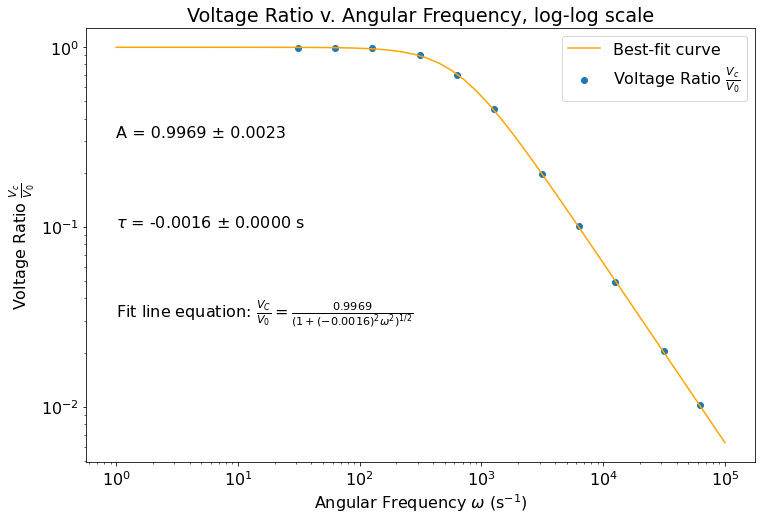

In [11]:
## Best-fit plots

# Sets figure size etc.
fig1=plt.figure(figsize=(12, 8))

# Data and fit
plt.scatter(x_data, y_data, label='Voltage Ratio $\\frac{V_c}{V_0}$')
plt.plot(freq_range, ypred, color='orange', label='Best-fit curve')

# Axes label and title
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Angular Frequency $\\omega$ (s$^{-1}$)')
plt.ylabel('Voltage Ratio $\\frac{V_c}{V_0}$')
plt.title('Voltage Ratio v. Angular Frequency, log-log scale')



# Text
plt.text(1, 10**(-0.5), "A = %5.4f \u00b1 %5.4f" % (pars[0], std_errs[0]))
plt.text(1, 10**(-1), "$\\tau$ = %5.4f \u00b1 %5.4f s" % (pars[1], std_errs[1]))
plt.text(1, 10**(-1.5), "Fit line equation: $\\frac{V_C}{V_0}=\\frac{%5.4f}{(1+(%5.4f)^2\\omega^2)^{1/2}}$" %
         (pars[0], pars[1]))

plt.savefig('fig2.png')